In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycountry

In [5]:
df = pd.read_csv('ds_salaries.csv')

In [6]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [8]:
media_dolares = np.mean(df['salary_in_usd'])
media_dolares

137570.38988015978

In [9]:
media_pais = df.groupby('company_location')['salary_in_usd'].mean()
media_pais

company_location
AE    100000.000000
AL     10000.000000
AM     50000.000000
AR     25000.000000
AS     29351.000000
          ...      
TH     23064.333333
TR     19058.000000
UA     57850.000000
US    151822.009539
VN     12000.000000
Name: salary_in_usd, Length: 72, dtype: float64

In [10]:
media_pais_ordenada = media_pais.sort_values(ascending=False)
media_pais_ordenada

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
          ...      
VN     12000.000000
AL     10000.000000
MA     10000.000000
BO      7500.000000
MK      6304.000000
Name: salary_in_usd, Length: 72, dtype: float64

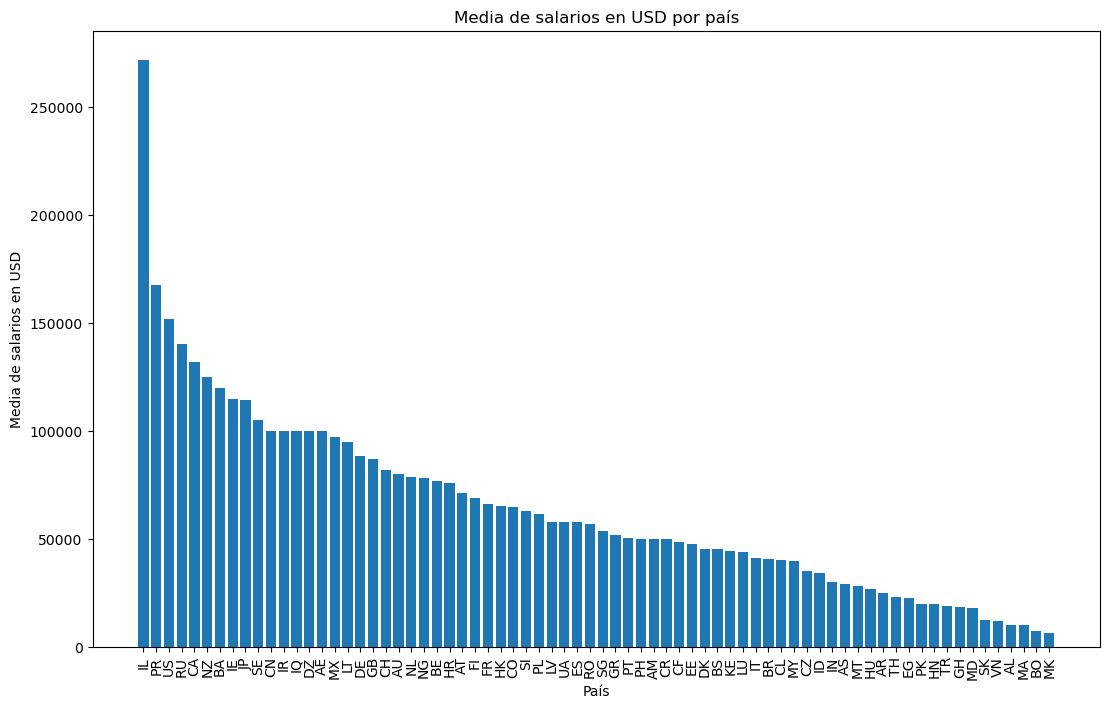

In [20]:
plt.figure(figsize=(13, 8))

plt.bar(media_pais_ordenada.index, media_pais_ordenada)

plt.xlabel('País')
plt.ylabel('Media de salarios en USD')
plt.title('Media de salarios en USD por país')
plt.xticks(rotation=90) 

plt.show()


In [17]:
residencias_unicas = df['employee_residence'].unique()

paises = [pycountry.countries.get(alpha_2=residencia) for residencia in residencias_unicas]
nombres_paises = [pais.name for pais in paises]
iniciales_paises = [pais.alpha_2 for pais in paises]

for inicial, nombre in zip(iniciales_paises, nombres_paises):
    print(f'{inicial}: {nombre}')

ES: Spain
US: United States
CA: Canada
DE: Germany
GB: United Kingdom
NG: Nigeria
IN: India
HK: Hong Kong
PT: Portugal
NL: Netherlands
CH: Switzerland
CF: Central African Republic
FR: France
AU: Australia
FI: Finland
UA: Ukraine
IE: Ireland
IL: Israel
GH: Ghana
AT: Austria
CO: Colombia
SG: Singapore
SE: Sweden
SI: Slovenia
MX: Mexico
UZ: Uzbekistan
BR: Brazil
TH: Thailand
HR: Croatia
PL: Poland
KW: Kuwait
VN: Viet Nam
CY: Cyprus
AR: Argentina
AM: Armenia
BA: Bosnia and Herzegovina
KE: Kenya
GR: Greece
MK: North Macedonia
LV: Latvia
RO: Romania
PK: Pakistan
IT: Italy
MA: Morocco
LT: Lithuania
BE: Belgium
AS: American Samoa
IR: Iran, Islamic Republic of
HU: Hungary
SK: Slovakia
CN: China
CZ: Czechia
CR: Costa Rica
TR: Turkey
CL: Chile
PR: Puerto Rico
DK: Denmark
BO: Bolivia, Plurinational State of
PH: Philippines
DO: Dominican Republic
EG: Egypt
ID: Indonesia
AE: United Arab Emirates
MY: Malaysia
JP: Japan
EE: Estonia
HN: Honduras
TN: Tunisia
RU: Russian Federation
DZ: Algeria
IQ: Iraq
B

In [21]:
salario_promedio_por_titulo = df.groupby('job_title')['salary_in_usd'].mean()

salario_promedio_por_titulo

job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64

In [22]:
salario_promedio_ordenado = salario_promedio_por_titulo.sort_values(ascending=False)
salario_promedio_ordenado

job_title
Data Science Tech Lead           375000.000
Cloud Data Architect             250000.000
Data Lead                        212500.000
Data Analytics Lead              211254.500
Principal Data Scientist         198171.125
                                    ...    
Autonomous Vehicle Technician     26277.500
3D Computer Vision Researcher     21352.250
Staff Data Analyst                15000.000
Product Data Scientist             8000.000
Power BI Developer                 5409.000
Name: salary_in_usd, Length: 93, dtype: float64

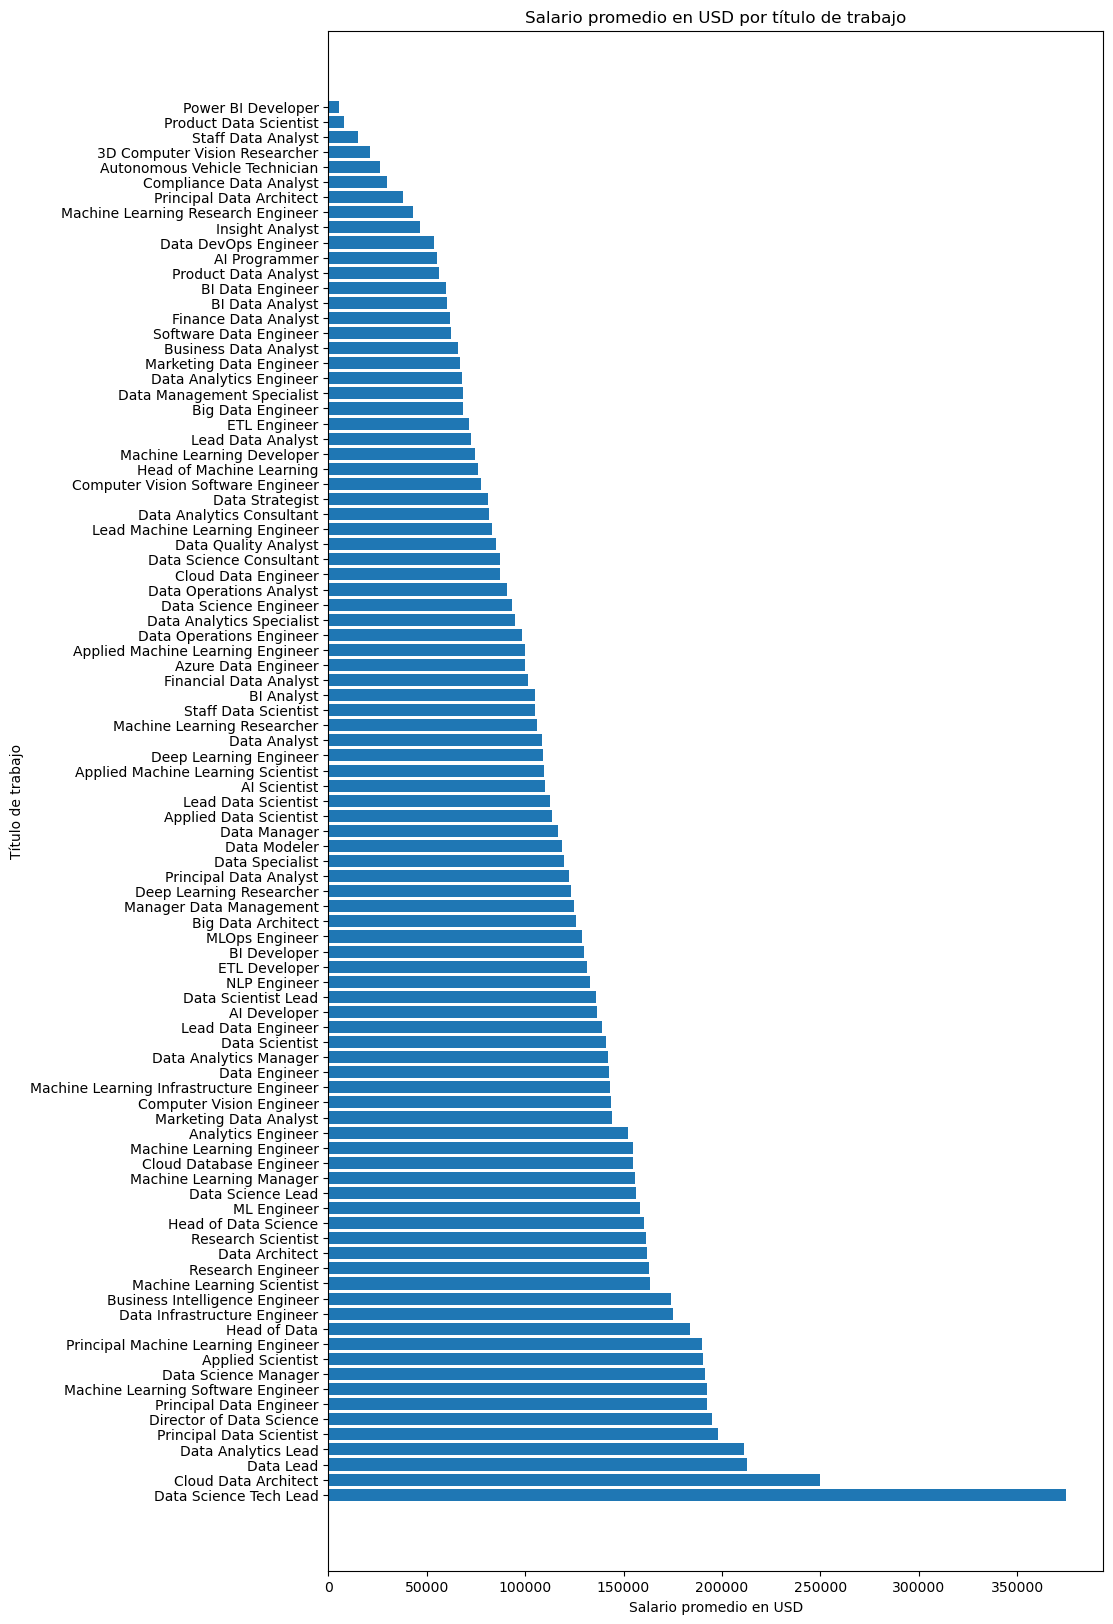

In [25]:
plt.figure(figsize=(10, 20))

plt.barh(salario_promedio_ordenado.index, salario_promedio_ordenado)

plt.xlabel('Salario promedio en USD')
plt.ylabel('Título de trabajo')
plt.title('Salario promedio en USD por título de trabajo')

plt.show()

In [26]:
salario_promedio_por_tamano = df.groupby('company_size')['salary_in_usd'].mean()
salario_promedio_por_tamano

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64

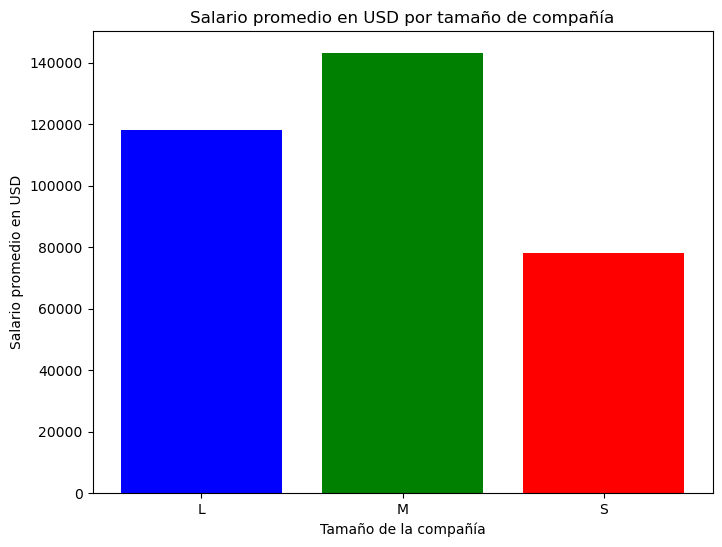

In [28]:
plt.figure(figsize=(8, 6))
colores = ['blue', 'green', 'red']

plt.bar(salario_promedio_por_tamano.index, salario_promedio_por_tamano, color=colores)

plt.xlabel('Tamaño de la compañía')
plt.ylabel('Salario promedio en USD')
plt.title('Salario promedio en USD por tamaño de compañía')

plt.show()

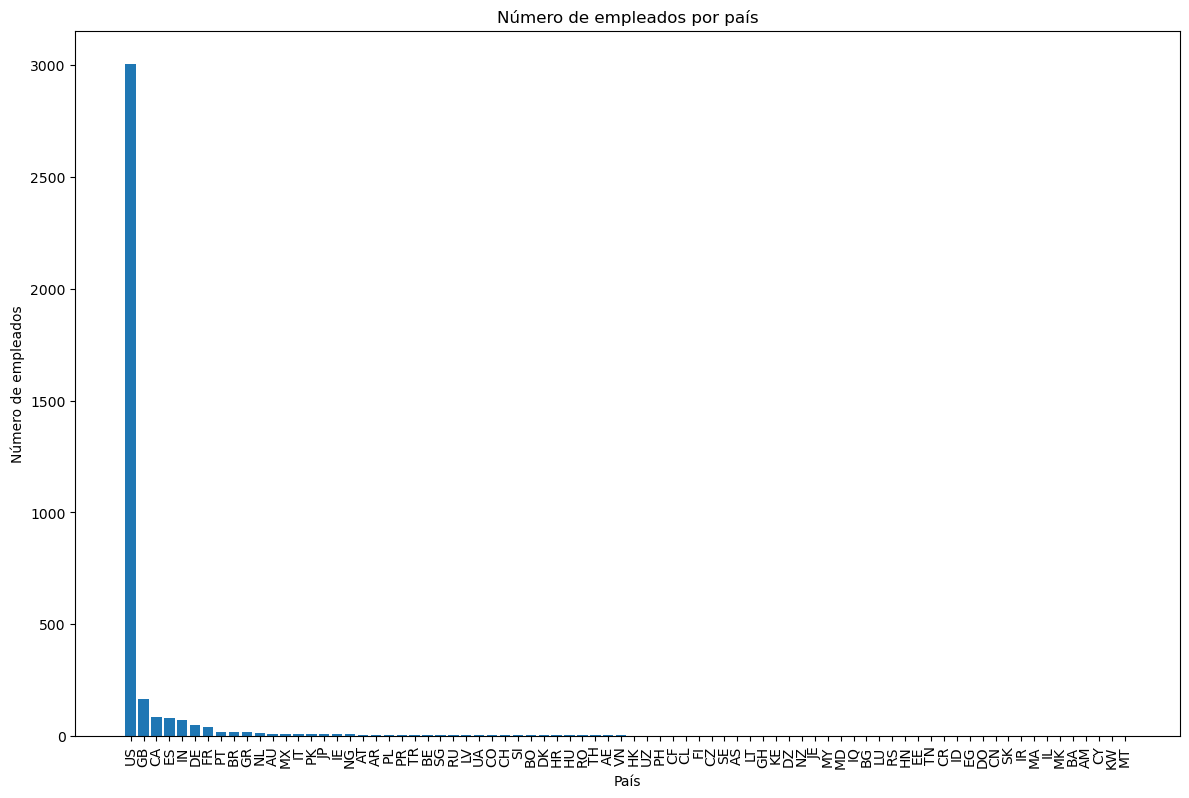

In [30]:
empleados_por_pais = df['employee_residence'].value_counts()

plt.figure(figsize=(12, 8))
plt.bar(empleados_por_pais.index, empleados_por_pais)

plt.xlabel('País')
plt.ylabel('Número de empleados')
plt.title('Número de empleados por país')

plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

In [31]:
trabajo_remoto = df['remote_ratio'].value_counts()

ubicacion_empresa = df['company_location'].value_counts()

print("Número de empleados por trabajo remoto:")
print(trabajo_remoto)

print("\nNúmero de empleados por ubicación de la empresa:")
print(ubicacion_empresa)


Número de empleados por trabajo remoto:
0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

Número de empleados por ubicación de la empresa:
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64


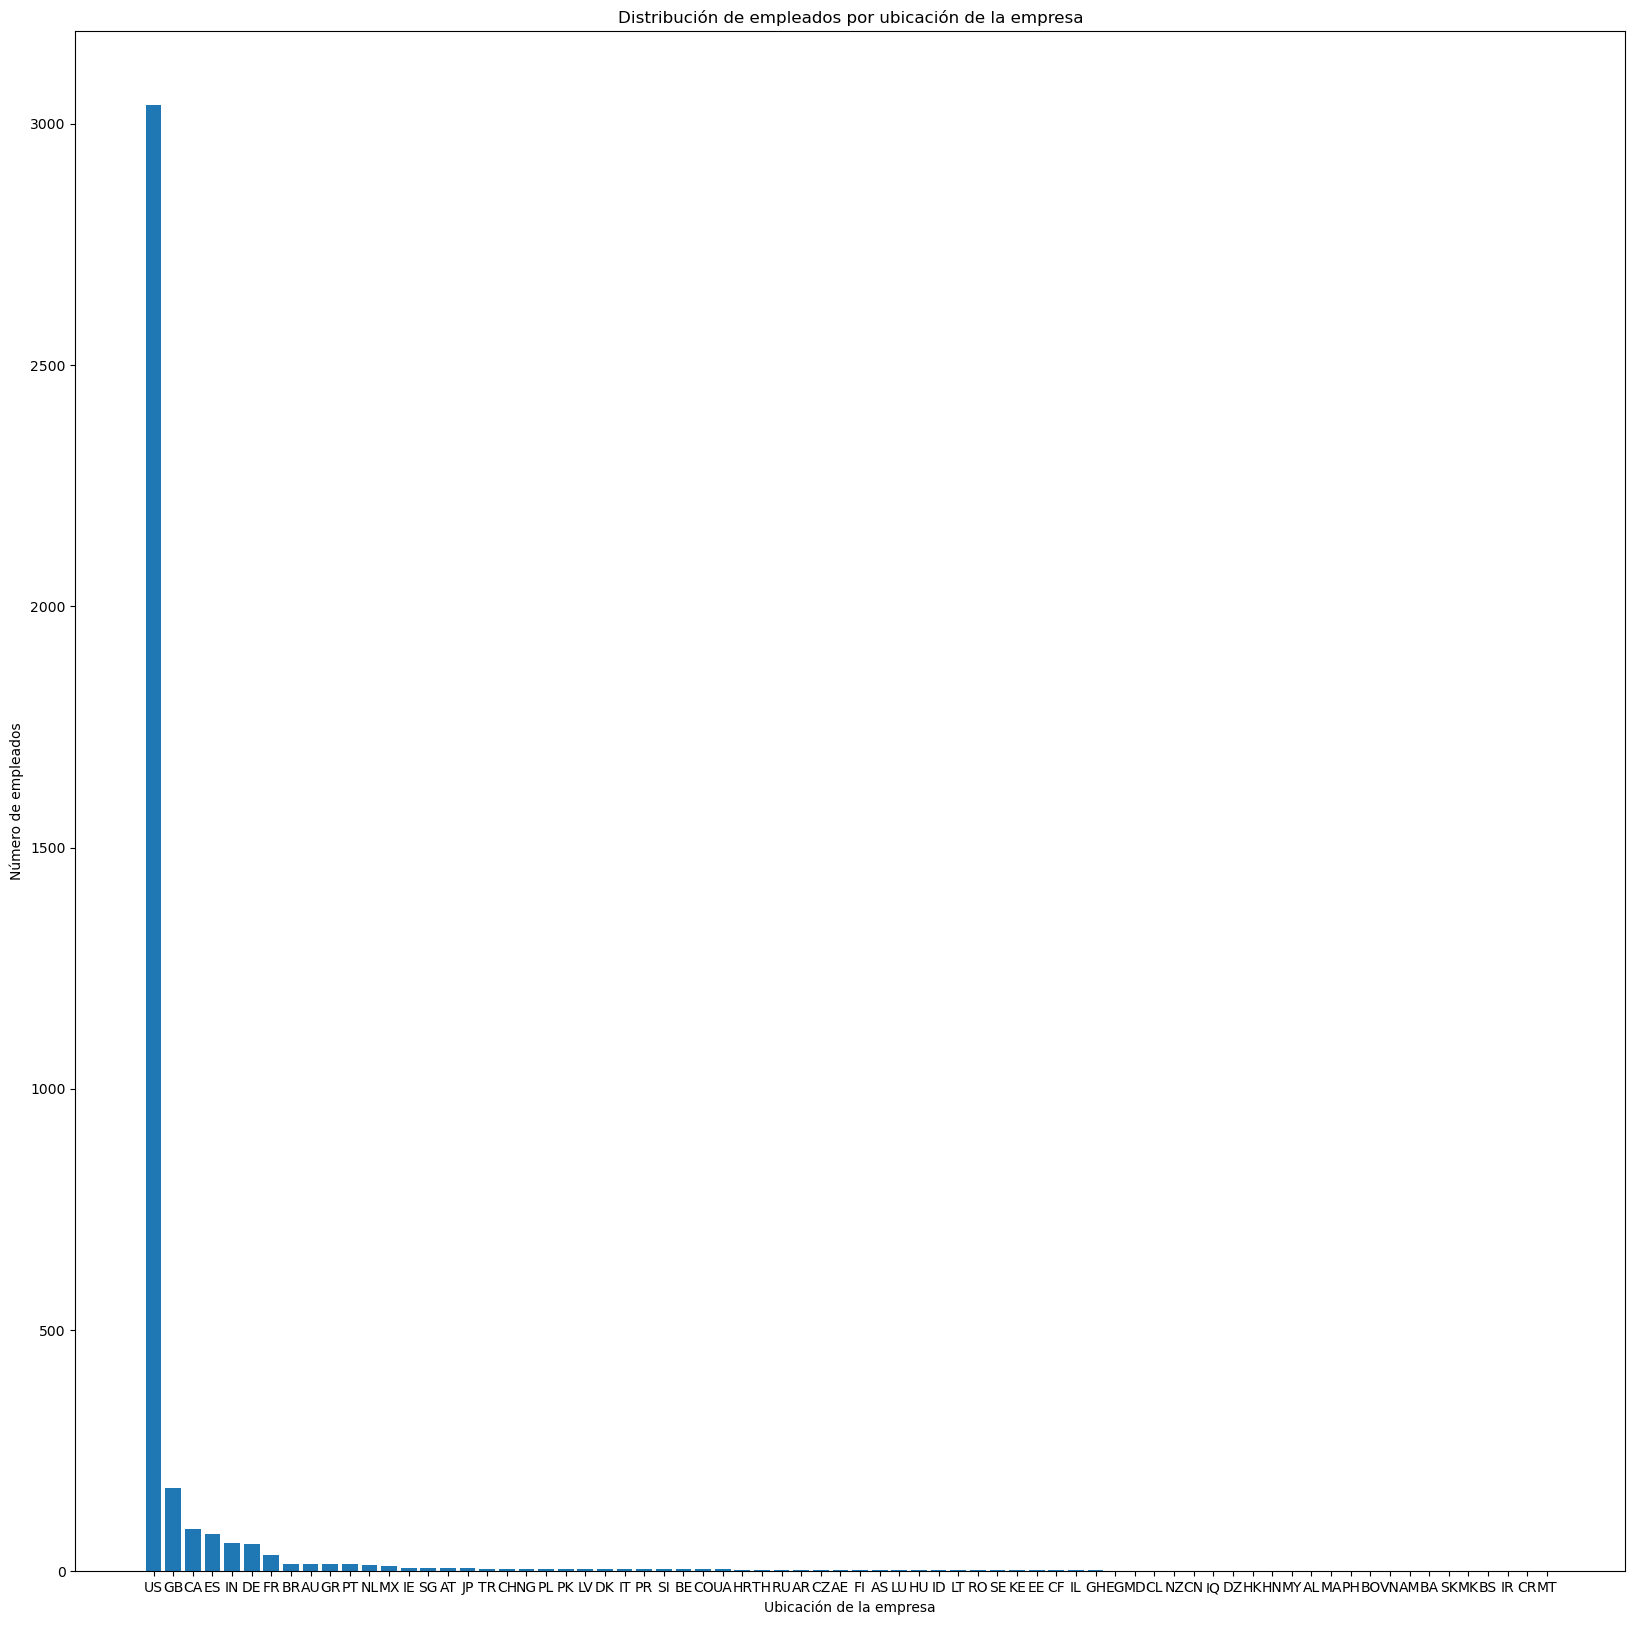

In [48]:
ubicacion_empresa = df['company_location'].value_counts()

plt.figure(figsize=(20, 20))

plt.bar(ubicacion_empresa.index, ubicacion_empresa)

plt.xlabel('Ubicación de la empresa')
plt.ylabel('Número de empleados')
plt.title('Distribución de empleados por ubicación de la empresa')

plt.show()


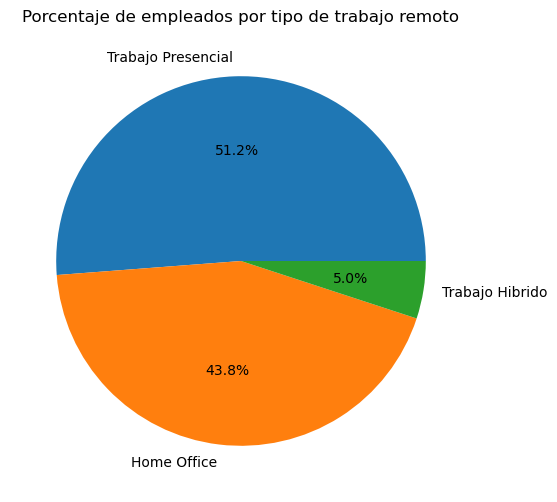

In [38]:
trabajo_remoto = df['remote_ratio'].value_counts()

plt.figure(figsize=(6, 6))

etiquetas = ['Trabajo Presencial', 'Home Office', 'Trabajo Hibrido']

plt.pie(trabajo_remoto, labels=etiquetas, autopct='%1.1f%%')

plt.title('Porcentaje de empleados por tipo de trabajo remoto')

plt.show()
